In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from math import sqrt

In [39]:
car_data=pd.read_csv('car data.csv')

In [40]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [41]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [44]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [45]:
#categorical value#

In [46]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [47]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [48]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [49]:
X = car_data.drop(['Car_Name','Selling_Price'],axis= 1)
Y = car_data['Selling_Price']

In [50]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [51]:
K=X.loc[[1],]

In [52]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

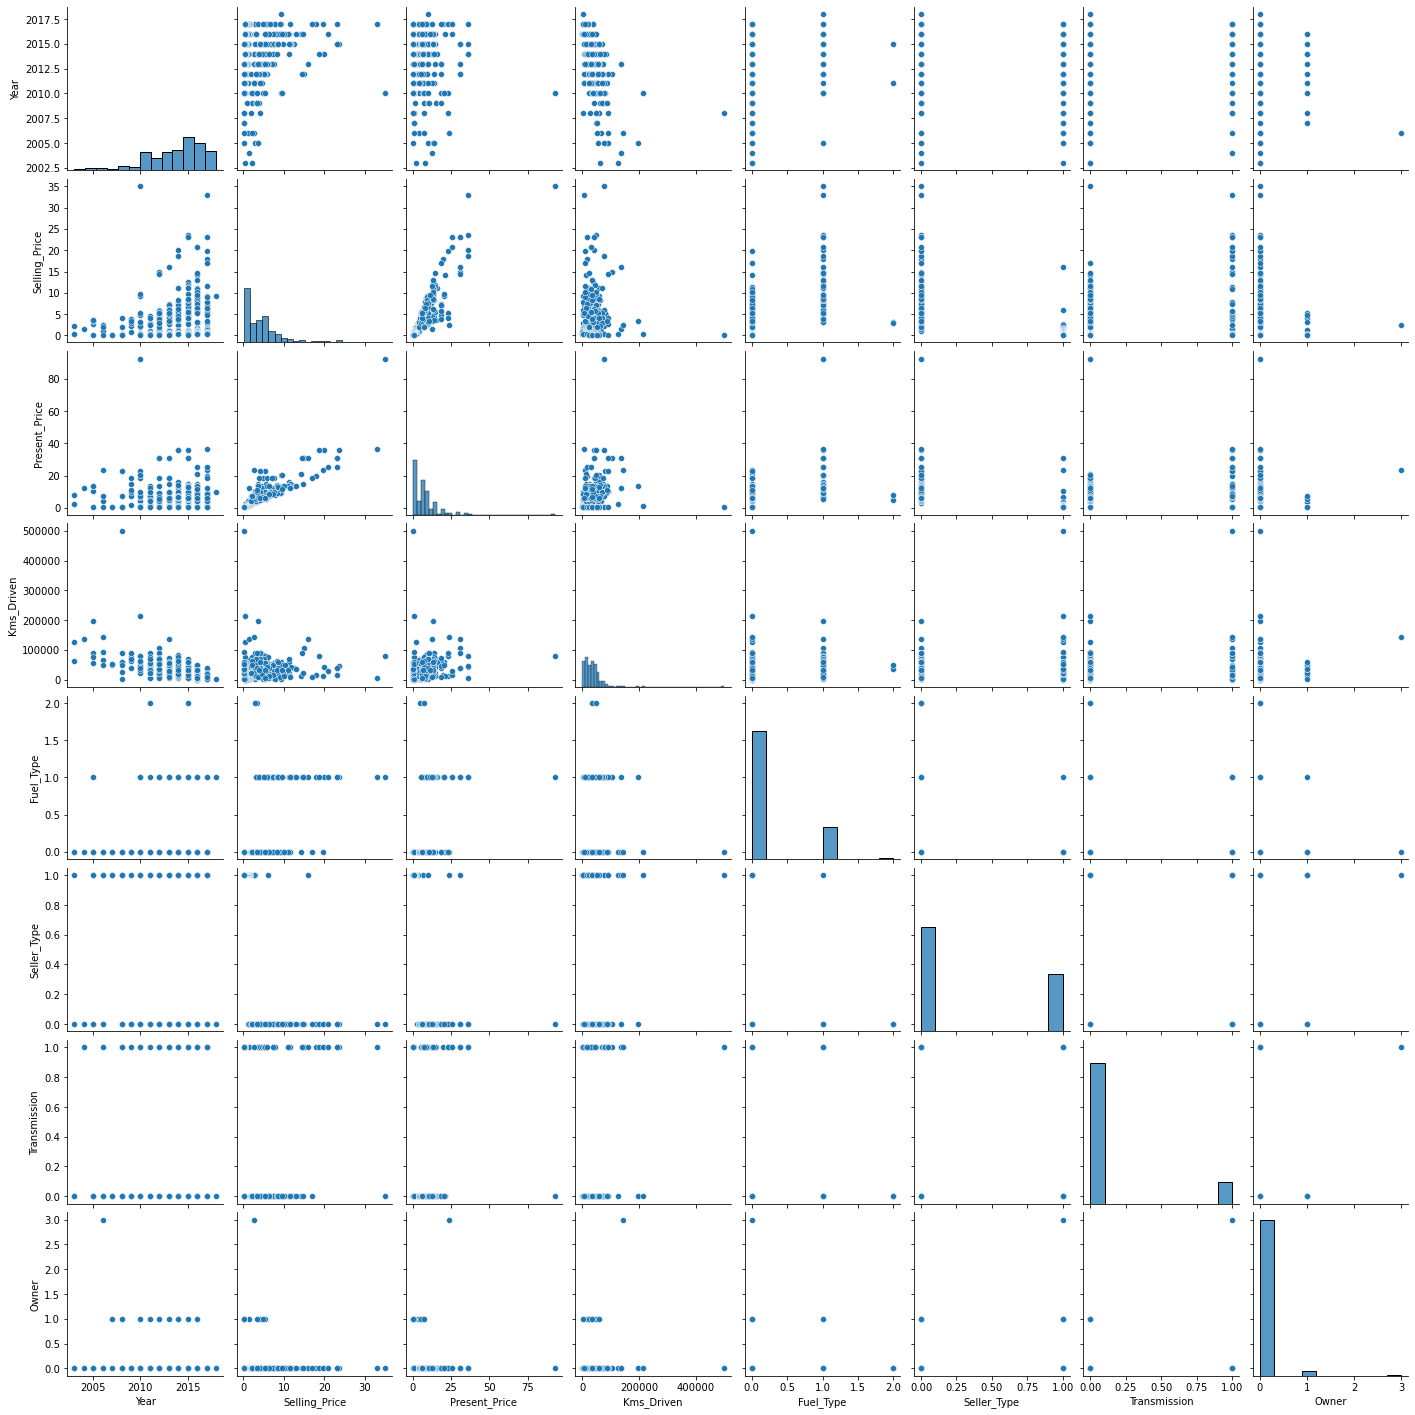

In [53]:
sns.pairplot(car_data)

In [54]:
#FIRST ASSUMPTION MULTICOLLINEARITY
X.corr()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Present_Price,-0.047584,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


Text(0.5, 1.0, 'Owner')

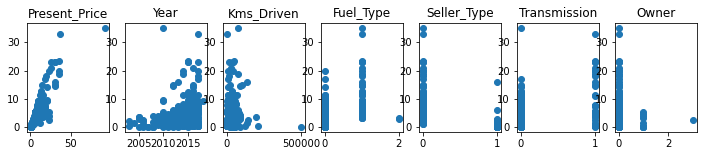

In [55]:
#Second assumption
#checking linearity of data
fig, (ax1, ax2, ax3 , ax4 , ax5,ax6 , ax7) = plt.subplots(ncols=7, figsize=(12, 2))
ax1.scatter(car_data['Present_Price'], car_data['Selling_Price'])
ax1.set_title("Present_Price")
ax2.scatter(car_data['Year'], car_data['Selling_Price'])
ax2.set_title("Year")
ax3.scatter(car_data['Kms_Driven'], car_data['Selling_Price'])
ax3.set_title("Kms_Driven")
ax4.scatter(car_data['Fuel_Type'], car_data['Selling_Price'])
ax4.set_title("Fuel_Type")
ax5.scatter(car_data['Seller_Type'], car_data['Selling_Price'])
ax5.set_title("Seller_Type")
ax6.scatter(car_data['Transmission'], car_data['Selling_Price'])
ax6.set_title("Transmission")
ax7.scatter(car_data['Owner'], car_data['Selling_Price'])
ax7.set_title("Owner")

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=30)

In [57]:
X_train.shape

(240, 7)

In [58]:
X_test.shape

(61, 7)

In [59]:
Y_train.shape

(240,)

In [60]:
Y_test.shape

(61,)

In [61]:
#LINEAR REGRESSION
lin_reg=LinearRegression()

In [62]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [63]:
lin_reg.intercept_

-659.1959291880646

In [64]:
lin_reg.coef_

array([ 3.28310309e-01,  4.23466588e-01, -1.32499110e-05,  1.43681149e+00,
       -1.48017934e+00,  1.16565484e+00,  1.59669358e-01])

In [65]:
#PREDICTION OF Y WITH RESPECT TO X PREDICTION
prediction = lin_reg.predict(X_train)

Text(0.5, 1.0, 'Actual vs predicted price')

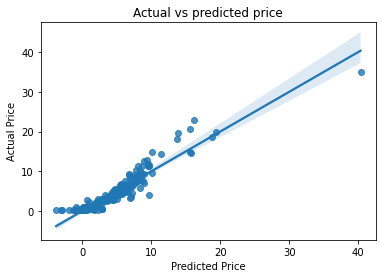

In [66]:
import seaborn as sns
sns.regplot(x=prediction, y=Y_train)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")

In [67]:
#Finding mean absolute error,mean sqaure error , RMSE
print("MAE: ", (metrics.mean_absolute_error(prediction, Y_train)))
print("MSE: ", (metrics.mean_squared_error(prediction, Y_train)))
print("R2 SCORE:", sqrt(metrics.r2_score(prediction, Y_train)))

MAE:  0.9716770467252064
MSE:  2.1529410316273467
R2 SCORE: 0.9411743775884795


In [68]:
test_prediction = lin_reg.predict(X_test)

Text(0.5, 1.0, 'Actual test vs predicted test price')

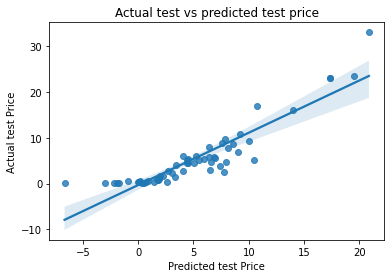

In [69]:
sns.regplot(x=test_prediction, y=Y_test)
plt.xlabel("Predicted test Price")
plt.ylabel('Actual test Price')
plt.title("Actual test vs predicted test price")

In [70]:
#Finding mean absolute error,mean sqaure error , RMSE
print("MAE: ", (metrics.mean_absolute_error(test_prediction, Y_test)))
print("MSE: ", (metrics.mean_squared_error(test_prediction, Y_test)))
print("R2 SCORE: ", (metrics.r2_score(test_prediction, Y_test)))

MAE:  1.7967325529247973
MSE:  7.809599216914562
R2 SCORE:  0.725077226167752


In [71]:
#finding residuals
y_pred = lin_reg.predict(X_train)
residual = Y_train - y_pred

In [72]:
residual

180    0.994794
211    2.277609
12    -0.025507
229   -1.885817
114   -0.116411
         ...   
131   -0.227908
145    0.624508
251   -0.133759
140    0.303294
293   -1.146614
Name: Selling_Price, Length: 240, dtype: float64

In [73]:
#finding means of Residuals
mean_residual = np.mean(residual)
print("Mean of Residuals {}".format(mean_residual))

Mean of Residuals 9.163780845256042e-14


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: set_theme() got an unexpected keyword argument 'xlabel'

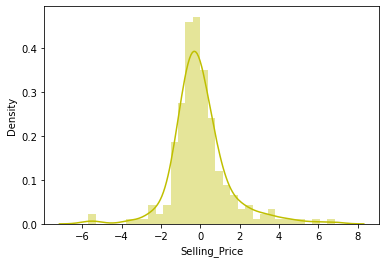

In [75]:
## 3rd assumption NORMALITY
sns.distplot(residual, color="y")
sns.set( xlabel = "residual", ylabel = "Density")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


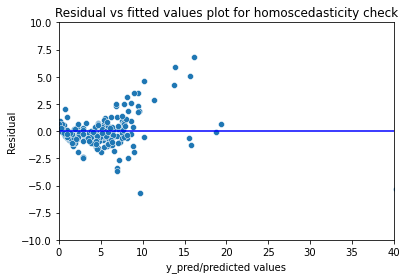

In [76]:
#FOURTH ASSUMPTION Homoscedasticity
p = sns.scatterplot(y_pred,residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residual')
plt.ylim(-10,10)
plt.xlim(0,40)
p = sns.lineplot([0,40],[0,0],color='blue')
p = plt.title('Residual vs fitted values plot for homoscedasticity check')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


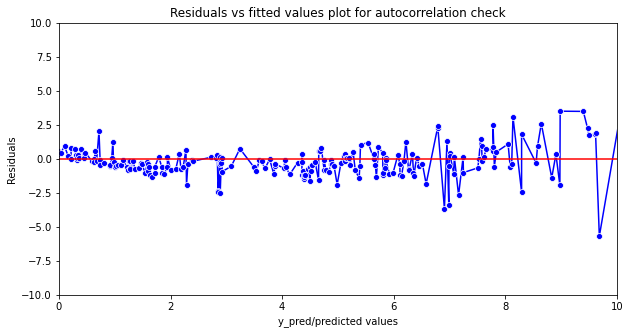

In [77]:
#FIFTH ASSUMPTION Autocorrelation of Residuals
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residual,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,10)
p = sns.lineplot([0,40],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [78]:
Y=lin_reg.fit(2013,9.54,43000,1,0,0,0)

TypeError: fit() takes from 3 to 4 positional arguments but 8 were given

In [79]:
X.loc[[2],]

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
2,2017,9.85,6900,0,0,0,0


In [80]:
ycheck=lin_reg.predict(X.loc[[2],])
yactual=Y.loc[[2]]
error=yactual-ycheck

In [81]:
yactual=Y.loc[[2]]

In [82]:
error=yactual-ycheck

In [83]:
error

2    0.164315
Name: Selling_Price, dtype: float64

In [84]:
ycheck=lin_reg.predict(X.loc[[2],])

In [85]:
X.loc[[2],]

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
2,2017,9.85,6900,0,0,0,0


In [86]:
ycheck=lin_reg.predict(X.loc[[2],])

In [87]:
ycheck

array([7.08568525])

In [88]:
yactual=Y.loc[[2]]

In [89]:
yactual

2    7.25
Name: Selling_Price, dtype: float64

In [90]:
error=yactual-ycheck

In [91]:
error

2    0.164315
Name: Selling_Price, dtype: float64

In [92]:
X.loc[[15],]

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,2016,10.79,43000,1,0,0,0


In [93]:
ycheck=lin_reg.predict(X.loc[[15],])

In [94]:
yactual=Y.loc[[15]]

In [95]:
yactual

15    7.75
Name: Selling_Price, dtype: float64

In [96]:
error=yactual-ycheck

In [97]:
error

15   -0.363923
Name: Selling_Price, dtype: float64